# Simulation of dynamic systems using solve_ivp, odeint

Z. Wang and D. Liu, "Stability Analysis for a Class of Systems: From Model-Based Methods to Data-Driven Methods," in IEEE Transactions on Industrial Electronics, vol. 61, no. 11, pp. 6463-6471, Nov. 2014, doi: 10.1109/TIE.2014.2308146.

## Equation (10)

$\left\{\begin{array}{l}\dot{x}_{1}(t)=-x_{1}(t)-x_{1}^{3}(t)+x_{2}(t)+3 u_{1}(t) \\ \dot{x}_{2}(t)=-x_{1}(t)-7 x_{2}(t)-2 x_{2}^{5}(t)+\sin (t) u_{2}(t) \\ y(t)=5 x_{1}(t)+6 u_{2}(t)-e^{-t}, \quad t \geq 0\end{array}\right.$

In [412]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

In [413]:
#plt.style.reload_library()
plt.style.use('science')

In [414]:
def f10dxdt(t, x, u):
    """
    Parameters
    --------
        x ... vector of state variables [x1 x2 ... xn]
        t ... time
        u ... input
        
    Returns
    --------
        (dx1_dt, dx2_dt)
    """
    dx1_dt = -x[0]-x[0]**3+x[1]+3*u[0][int(t)]
    dx2_dt = -x[0]-7*x[1]-2*x[1]**5+math.sin(math.radians(u[1][int(t)]))
    return dx1_dt, dx2_dt

def get_y10(x, u, t):
    y = []
    for t in range(len(t)):
        y.append(float(x[0][t]+6*u[1][t]-np.exp(t)))
    return y

In [415]:
dt = 0.1
t = np.arange(0,40,dt)

u1 = np.sin(2*math.pi/10*t)
u2 = np.cos(2*math.pi/10*t)
u=[u1, u2]

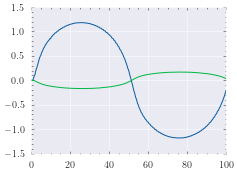

In [416]:
x0 = [0, 0]
# x = odeint(f10dxdt, x0, t, (u,))
x = solve_ivp(f10dxdt, [0, 100], x0, args=[u])
plt.plot(x.t, x.y[0].T, x.t, x.y[1].T)
plt.show()

In [417]:
y = get_y10(x.y, u, x.t)

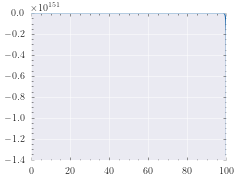

In [418]:
plt.plot(x.t,y)
plt.show()

## Equation (11)

$\left\{\begin{array}{l}\dot{x}(t)=-\frac{x(t)}{1+x^{2}(t)}+u(t) \\ y(t)=3 x(t)+\cos (t), \quad t \geq 0\end{array}\right.$

In [436]:
def f11dxdt(t, x, u):
    """
    Parameters
    --------
        x ... vector of state variables [x1 x2 ... xn]
        t ... time
        u ... input
        
    Returns
    --------
        dx_dt
    """
    dx_dt = -(x/(1+x**2))+u[int(t)]
    return dx_dt

def get_y11(x, u, t):
    y = []
    for t in range(len(t)):
        y.append(float(3*x[0][t]+math.cos(math.radians(u[t]))))
    return y

In [437]:
dt = 0.1
t = np.arange(0,40,dt)

u = np.sin(2*math.pi/10*t)

In [438]:
x0 = [0]

# x = odeint(f11dxdt, x0, t, (u,))
x = solve_ivp(f11dxdt, [0, 50], x0, args=[u])

# plt.plot(x.t, x.y.T)

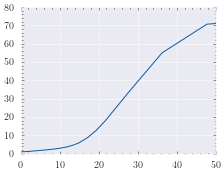

In [441]:
y = get_y11(x.y, u, x.t)

plt.plot(x.t,y)
plt.show()